In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.formula.api as smf

from sklearn import linear_model
# logistic regression is part of sklearn - linear model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('C:\Users\morgane1\Desktop\policefatalities.csv'))

In [3]:
df

,Name,Cause of Death,Date of Death,State,City,...,Month of Death,Year of Death,Was the deceased armed?,Did the deceased have priors?,Was the officer involved fired or suspended?
0,Hue Dang,Car Accident,11/3/2015,New Jersey,"Hackensack, New Jersey",...,March,2015,No,Unclear,Unclear
1,Bien Cam Tran,Car Accident,3/9/2014,California,"Oakland, California",...,14-Sep,2014,Unclear,Unclear,Unclear
2,Jacqueline Reynolds,Car Accident,8/5/2013,Illinois,"Chicago, Illinois",...,13-May,2013,No,No,No
3,Bernard Moore,Car Accident,6/3/2015,Georgia,"Atlanta, Georgia",...,March,2015,No,Unclear,Unclear
4,Jacqueline Nichols,Car Accident,4/7/2014,Michigan,"Flint, Michigan",...,14-Jul,2014,Unclear,Unclear,Unclear
...,...,...,...,...,...,...,...,...,...,...,...
2350,Timothy Shad Griffis,Taser Gun,25/08/2014,Florida,"Lake City, Florida",...,14-Aug,2014,No,Yes,Yes
2351,Billy Collins,Taser Gun,29/5/15,Kentucky,"Louisa, Kentucky",...,May,2015,No,Unclear,Unclear
2352,Michael Tyrone Gallagher,Taser Gun,11/5/2015,North Carolina,"Enfield, North Carolina",...,May,2015,No,Unclear,Unclear
2353,Randall Torrence,Taser Gun,27/5/15,Kansas,"Kansas City, Kansas",...,May,2015,No,Unclear,Unclear


In [4]:
df.shape

(2355, 15)

In [5]:
list(df.columns.values)

['Name',
 'Cause of Death',
 'Date of Death',
 'State',
 'City',
 'Gender',
 'Age',
 'Race',
 'Photo',
 'News Story',
 'Month of Death',
 'Year of Death',
 'Was the deceased armed?',
 'Did the deceased have priors?',
 'Was the officer involved fired or suspended?']

In [6]:
df = df.rename(columns = {'Cause of Death':'cause_death', 'Date of Death': 'date_death', 'Month of Death': 'month_death', 'Year of Death':'year_death','Was the deceased armed?':'armed', 'Did the deceased have priors?':'priors','Was the officer involved fired or suspended?':'fired'})

In [7]:
list(df.columns.values)

['Name',
 'cause_death',
 'date_death',
 'State',
 'City',
 'Gender',
 'Age',
 'Race',
 'Photo',
 'News Story',
 'month_death',
 'year_death',
 'armed',
 'priors',
 'fired']

In [8]:
df.drop(['Name', 'date_death','City','News Story','Photo','month_death','year_death'], axis=1, inplace=True)
df.head()

,cause_death,State,Gender,Age,Race,armed,priors,fired
0,Car Accident,New Jersey,Female,64.0,Asian,No,Unclear,Unclear
1,Car Accident,California,Male,58.0,Asian,Unclear,Unclear,Unclear
2,Car Accident,Illinois,Female,54.0,Black,No,No,No
3,Car Accident,Georgia,Male,62.0,Black,No,Unclear,Unclear
4,Car Accident,Michigan,Female,64.0,Black,Unclear,Unclear,Unclear


In [9]:
#bucket the ages by groups. - ranges 
df.Age.value_counts()

26.0     86
34.0     81
27.0     79
28.0     76
29.0     75
         ..
97.0      1
95.0      1
93.0      1
77.0      1
107.0     1
Name: Age, dtype: int64

In [10]:
print df.Age.mean()
print df.Age.median()
print df.Age.max()
print df.Age.min()

36.9122422115
34.0
107.0
5.0


In [11]:
print df[(df.Age == 107)]

    cause_death     State Gender    Age   Race armed   priors    fired
338    Shooting  Arkansas   Male  107.0  Black   Yes  Unclear  Unclear


In [12]:
df.State.value_counts()
#could just look at california and texas (or look at top 5)
#could also look at red / blue states 

California        398
Texas             237
Florida           187
Arizona           104
Illinois           68
                 ... 
New Hampshire       4
Virgin Islands      2
Rhode Island        2
Vermont             2
North Dakota        1
Name: State, dtype: int64

In [13]:
df.armed.value_counts()

Yes         1482
Unclear      550
No           275
Disputed      48
Name: armed, dtype: int64

In [14]:
df.priors.value_counts()

Unclear    1803
Yes         435
No          117
Name: priors, dtype: int64

In [15]:
df.cause_death.value_counts()
#consider all as fatalities and - can be dropped. Don't drop but don't remove. 

Shooting                  2076
Taser Gun                   97
Car Accident                69
Physical Confrontation      63
Other                       50
Name: cause_death, dtype: int64

In [16]:
df.Gender.value_counts()


Male       2210
Female      142
Unknown       3
Name: Gender, dtype: int64

In [17]:
df.Race.value_counts()

White               766
Unknown             713
Black               511
Latino              319
Asian                27
Native American      16
Pacific Islander      3
Name: Race, dtype: int64

In [18]:
df.fired.unique()

array(['Unclear', 'No', 'Yes'], dtype=object)

In [19]:
df.fired.value_counts()

Unclear    1571
Yes         665
No          119
Name: fired, dtype: int64

In [20]:
df = df.dropna(subset = ['fired'])
df.fired.unique()

array(['Unclear', 'No', 'Yes'], dtype=object)

In [21]:
bins = [0, 25, 35, 45, 55, 65, 107]
group_names = ['<25','25-34','35-44','45-54','55-65','>65']


In [22]:
age_range = pd.cut(df['Age'], bins, labels = group_names)
df['age_range'] = pd.cut(df['Age'], bins, labels = group_names)
age_range

0       55-65
1       55-65
2       45-54
3       55-65
4       55-65
        ...  
2350    35-44
2351    55-65
2352    45-54
2353    25-34
2354    25-34
Name: Age, dtype: category
Categories (6, object): [<25 < 25-34 < 35-44 < 45-54 < 55-65 < >65]

In [23]:
blue_state_list = ['Washington','Oregon','California','Nevada','Colorado','New Mexico','Minnesota','Iowa','Wisconsin','Illinois','Wisconsin','Michigan','Pennsylvania','New York','Virginia','New Jersey','Delaware','Washington DC','Maryland','Maine','New Hampshire','Rhode Island', 'Connecticut','Massachusetts','Vermont']
def blue_or_red(state):
    if state in blue_state_list: 
        return "blue"
    else: 
        return "red"
    
df['red_blue'] = df.State.apply(blue_or_red)

Grouped the states by Red and Blue (Republican / Democrat) based on http://www.politico.com/magazine/story/2014/05/climate-change-map-red-state-blue-state-hot-state-cold-state-107028, these are 2014 categories because the majority of the data in my set is from 2014.

In [24]:
df

,cause_death,State,Gender,Age,Race,armed,priors,fired,age_range,red_blue
0,Car Accident,New Jersey,Female,64.0,Asian,No,Unclear,Unclear,55-65,blue
1,Car Accident,California,Male,58.0,Asian,Unclear,Unclear,Unclear,55-65,blue
2,Car Accident,Illinois,Female,54.0,Black,No,No,No,45-54,blue
3,Car Accident,Georgia,Male,62.0,Black,No,Unclear,Unclear,55-65,red
4,Car Accident,Michigan,Female,64.0,Black,Unclear,Unclear,Unclear,55-65,blue
...,...,...,...,...,...,...,...,...,...,...
2350,Taser Gun,Florida,Male,41.0,White,No,Yes,Yes,35-44,red
2351,Taser Gun,Kentucky,Male,56.0,White,No,Unclear,Unclear,55-65,red
2352,Taser Gun,North Carolina,Male,55.0,White,No,Unclear,Unclear,45-54,red
2353,Taser Gun,Kansas,Male,34.0,White,No,Unclear,Unclear,25-34,red


In [25]:
df_income = pd.read_csv(os.path.join('C:\Users\morgane1\Desktop\householdincome.csv'))

In [26]:
df_income

,State,2014 Q4,2015 Q1,2015 Q2,2015 Q3,2015 Q4,2016 Q1,Average
0,Alabama,"185,184","187,169","188,291","190,124","191,432","193,367",189261.2
1,Alaska,"40,416","41,247","41,454","41,269","41,341","41,598",41220.8
2,Arizona,"259,230","262,205","265,861","268,172","271,656","274,734",266976.3
3,Arkansas,"114,175","114,387","116,028","117,369","118,284","119,754",116666.2
4,California,"1,974,525","2,011,012","2,056,153","2,077,759","2,099,673","2,119,407",2056421.5
...,...,...,...,...,...,...,...,...
46,Virginia,"424,916","428,614","435,402","440,294","443,693","448,565",436914.0
47,Washington,"358,280","358,961","366,344","369,789","373,291","378,921",367597.7
48,West Virginia,"67,683","67,676","68,320","68,605","68,549","68,874",68284.5
49,Wisconsin,"258,944","259,098","262,009","265,406","268,063","270,608",264021.3


Source of income analysis is the U.S. Bureau of Economic Analysis: http://www.bea.gov/newsreleases/regional/spi/sqpi_newsrelease.htm

In [27]:
df_income['Average '].mean()

300689.362745098

In [28]:
df_income['Average '].median()

186600.5

In [29]:
df_income = df_income.dropna(subset = ['Average '])


In [30]:
df_income['Average '].quantile([.25, .5, .75])

0.25     70918.85
0.50    186600.50
0.75    388273.45
Name: Average , dtype: float64

In [31]:
df_income['Average '].max()

2056421.5

In [32]:
bins = [0, 75000, 200000, 400000, 3000000]
group_names = ['<75000','75000-200000','200000-400000','>400000']

In [33]:
income_range = pd.cut(df_income['Average '], bins, labels = group_names)
df_income['income_range'] = pd.cut(df_income['Average '], bins, labels = group_names)
income_range

0      75000-200000
1            <75000
2     200000-400000
3      75000-200000
4           >400000
          ...      
46          >400000
47    200000-400000
48           <75000
49    200000-400000
50           <75000
Name: Average , dtype: category
Categories (4, object): [<75000 < 75000-200000 < 200000-400000 < >400000]

In [34]:
state_income = pd.concat([df_income['State'], df_income['income_range']], axis = 1)
state_income



,State,income_range
0,Alabama,75000-200000
1,Alaska,<75000
2,Arizona,200000-400000
3,Arkansas,75000-200000
4,California,>400000
...,...,...
46,Virginia,>400000
47,Washington,200000-400000
48,West Virginia,<75000
49,Wisconsin,200000-400000


In [35]:
df = pd.merge(df, state_income, on = 'State')
df

,cause_death,State,Gender,Age,Race,...,priors,fired,age_range,red_blue,income_range
0,Car Accident,New Jersey,Female,64.0,Asian,...,Unclear,Unclear,55-65,blue,>400000
1,Car Accident,New Jersey,Female,34.0,Black,...,Unclear,Unclear,25-34,blue,>400000
2,Car Accident,New Jersey,Male,41.0,Black,...,Unclear,Unclear,35-44,blue,>400000
3,Car Accident,New Jersey,Male,10.0,White,...,Unclear,Unclear,<25,blue,>400000
4,Other,New Jersey,Male,27.0,Black,...,Yes,No,25-34,blue,>400000
...,...,...,...,...,...,...,...,...,...,...,...
2340,Shooting,West Virginia,Male,18.0,White,...,Unclear,Unclear,<25,red,<75000
2341,Shooting,West Virginia,Male,46.0,White,...,Yes,Unclear,45-54,red,<75000
2342,Shooting,Vermont,Male,35.0,Unknown,...,Unclear,Unclear,25-34,blue,<75000
2343,Shooting,Vermont,Male,49.0,White,...,Unclear,Yes,45-54,blue,<75000


In [36]:
df_pop = pd.read_csv(os.path.join('C:\Users\morgane1\Desktop\pop_density.csv'))

In [37]:
df_pop

,State,den_mi_sq,den_km_sq,2015 population
0,Alabama,96,37.0,"4,858,979"
1,Alaska,1,0.5,"738,432"
2,Arizona,60,23.2,"6,828,065"
3,Arkansas,57,22.1,"2,978,204"
4,California,251,97.0,"39,144,818"
...,...,...,...,...
46,Virginia,212,82.0,"8,382,993"
47,Washington,108,41.7,"7,170,351"
48,West Virginia,77,29.6,"1,844,128"
49,Wisconsin,107,41.2,"5,771,337"


In [38]:
df_pop.max()

State               Wyoming
den_mi_sq              9800
den_km_sq             467.2
2015\npopulation    945,934
dtype: object

In [39]:
df_pop['den_mi_sq']

0      96
1       1
2      60
3      57
4     251
     ... 
46    212
47    108
48     77
49    107
50      6
Name: den_mi_sq, dtype: int64

In [40]:
df_pop['den_mi_sq'].quantile([.25,.50,.75])

0.25     48.0
0.50    107.0
0.75    227.5
Name: den_mi_sq, dtype: float64

In [41]:
df_pop['den_mi_sq'].max()

9800

In [42]:
bins = [0, 50, 110, 250,10000]
group_names = ['<50','50-110','110-250','>250']

In [43]:
df_den = pd.cut(df_pop['den_mi_sq'], bins, labels = group_names)
df_pop['df_den'] = pd.cut(df_pop['den_mi_sq'], bins, labels = group_names)
df_den

0      50-110
1         <50
2      50-110
3      50-110
4        >250
       ...   
46    110-250
47     50-110
48     50-110
49     50-110
50        <50
Name: den_mi_sq, dtype: category
Categories (4, object): [<50 < 50-110 < 110-250 < >250]

In [44]:
pop_den = pd.concat([df_pop['State'], df_pop['df_den']], axis = 1)
pop_den

,State,df_den
0,Alabama,50-110
1,Alaska,<50
2,Arizona,50-110
3,Arkansas,50-110
4,California,>250
...,...,...
46,Virginia,110-250
47,Washington,50-110
48,West Virginia,50-110
49,Wisconsin,50-110


In [45]:
df = pd.merge(df, pop_den, on = 'State')
df

,cause_death,State,Gender,Age,Race,...,fired,age_range,red_blue,income_range,df_den
0,Car Accident,New Jersey,Female,64.0,Asian,...,Unclear,55-65,blue,>400000,>250
1,Car Accident,New Jersey,Female,34.0,Black,...,Unclear,25-34,blue,>400000,>250
2,Car Accident,New Jersey,Male,41.0,Black,...,Unclear,35-44,blue,>400000,>250
3,Car Accident,New Jersey,Male,10.0,White,...,Unclear,<25,blue,>400000,>250
4,Other,New Jersey,Male,27.0,Black,...,No,25-34,blue,>400000,>250
...,...,...,...,...,...,...,...,...,...,...,...
2340,Shooting,West Virginia,Male,18.0,White,...,Unclear,<25,red,<75000,50-110
2341,Shooting,West Virginia,Male,46.0,White,...,Unclear,45-54,red,<75000,50-110
2342,Shooting,Vermont,Male,35.0,Unknown,...,Unclear,25-34,blue,<75000,50-110
2343,Shooting,Vermont,Male,49.0,White,...,Yes,45-54,blue,<75000,50-110


In [46]:
df_den = pd.get_dummies(df['df_den'], prefix = 'den')
df_den

,den_110-250,den_50-110,den_<50,den_>250
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
2340,0.0,1.0,0.0,0.0
2341,0.0,1.0,0.0,0.0
2342,0.0,1.0,0.0,0.0
2343,0.0,1.0,0.0,0.0


In [47]:
df_red_blue = pd.get_dummies(df['red_blue'])
df_red_blue

,blue,red
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
2340,0.0,1.0
2341,0.0,1.0
2342,1.0,0.0
2343,1.0,0.0


In [48]:
df_priors = pd.get_dummies(df['priors'], prefix = 'priors')
df_priors

,priors_No,priors_Unclear,priors_Yes
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
2340,0.0,1.0,0.0
2341,0.0,0.0,1.0
2342,0.0,1.0,0.0
2343,0.0,1.0,0.0


In [49]:
df_armed = pd.get_dummies(df['armed'], prefix = 'armed')
df_armed

,armed_Disputed,armed_No,armed_Unclear,armed_Yes
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
2340,0.0,0.0,0.0,1.0
2341,0.0,0.0,0.0,1.0
2342,0.0,0.0,1.0,0.0
2343,0.0,0.0,0.0,1.0


In [50]:
df_race = pd.get_dummies(df['Race'])
df_race

,Asian,Black,Latino,Native American,Pacific Islander,Unknown,White
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2340,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2341,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2342,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2343,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
df_age_range = pd.get_dummies(df['age_range'])
df_age_range

,25-34,35-44,45-54,55-65,<25,>65
0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2340,0.0,0.0,0.0,0.0,1.0,0.0
2341,0.0,0.0,1.0,0.0,0.0,0.0
2342,1.0,0.0,0.0,0.0,0.0,0.0
2343,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
df_income_range = pd.get_dummies(df['income_range'])
df_income_range

,200000-400000,75000-200000,<75000,>400000
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
2340,0.0,0.0,1.0,0.0
2341,0.0,0.0,1.0,0.0
2342,0.0,0.0,1.0,0.0
2343,0.0,0.0,1.0,0.0


In [53]:
df_fired = pd.get_dummies(df['fired'], prefix = 'fired')
df_fired

,fired_No,fired_Unclear,fired_Yes
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
2340,0.0,1.0,0.0
2341,0.0,1.0,0.0
2342,0.0,1.0,0.0
2343,0.0,0.0,1.0


In [54]:
df_new = pd.concat([df, df_age_range, df_race, df_priors, df_armed, df_red_blue, df_den, df_income_range, df_fired], axis = 1)
df_new

,cause_death,State,Gender,Age,Race,...,<75000,>400000,fired_No,fired_Unclear,fired_Yes
0,Car Accident,New Jersey,Female,64.0,Asian,...,0.0,1.0,0.0,1.0,0.0
1,Car Accident,New Jersey,Female,34.0,Black,...,0.0,1.0,0.0,1.0,0.0
2,Car Accident,New Jersey,Male,41.0,Black,...,0.0,1.0,0.0,1.0,0.0
3,Car Accident,New Jersey,Male,10.0,White,...,0.0,1.0,0.0,1.0,0.0
4,Other,New Jersey,Male,27.0,Black,...,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2340,Shooting,West Virginia,Male,18.0,White,...,1.0,0.0,0.0,1.0,0.0
2341,Shooting,West Virginia,Male,46.0,White,...,1.0,0.0,0.0,1.0,0.0
2342,Shooting,Vermont,Male,35.0,Unknown,...,1.0,0.0,0.0,1.0,0.0
2343,Shooting,Vermont,Male,49.0,White,...,1.0,0.0,0.0,0.0,1.0


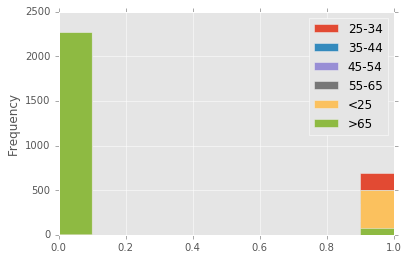

In [55]:
df_age_range.plot(kind = 'hist')

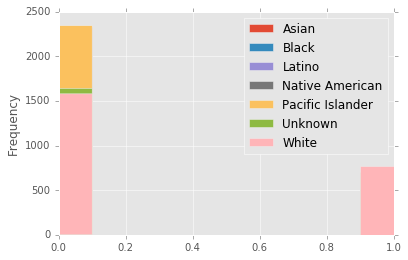

In [56]:
df_race.plot(kind = 'hist')

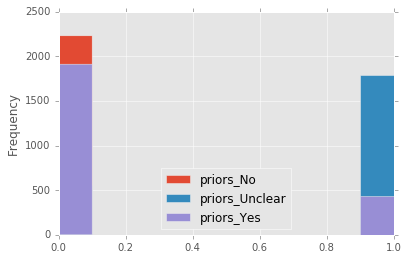

In [57]:
df_priors.plot(kind = 'hist')

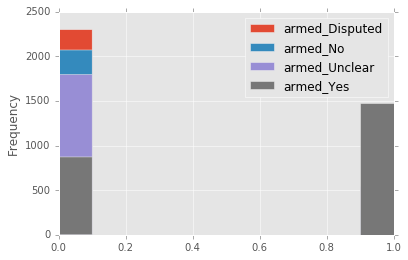

In [58]:
df_armed.plot(kind = 'hist')

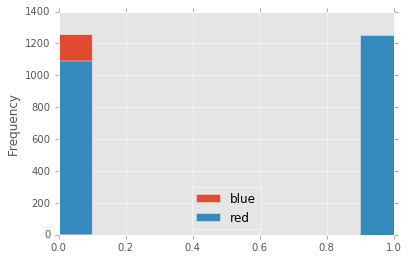

In [59]:
df_red_blue.plot(kind = 'hist')

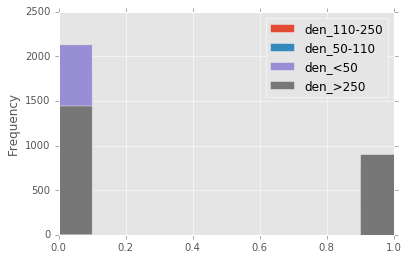

In [60]:
df_den.plot(kind = 'hist')

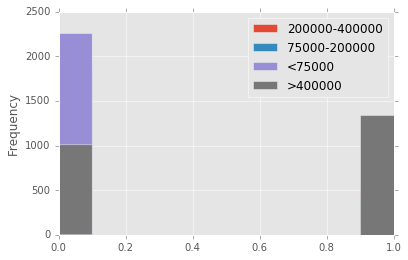

In [61]:
df_income_range.plot(kind = 'hist')

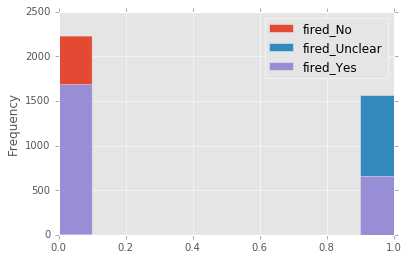

In [63]:
df_fired.plot(kind = 'hist')

In [64]:
pd.crosstab([df_new.fired_Yes, df_new.fired_Unclear], df_new.Black, margins = True)


Black                     0.0  1.0   All
fired_Yes fired_Unclear                 
0.0       0.0              90   29   119
          1.0            1229  333  1562
1.0       0.0             518  146   664
All                      1837  508  2345

In [65]:
pd.crosstab([df_new.fired_Yes, df_new.fired_Unclear], df_new.White, margins = True)

White                     0.0  1.0   All
fired_Yes fired_Unclear                 
0.0       0.0              81   38   119
          1.0            1078  484  1562
1.0       0.0             420  244   664
All                      1579  766  2345

In [66]:
pd.crosstab([df_new.fired_Yes, df_new.fired_Unclear], df_new.red, margins = True)

red                       0.0   1.0   All
fired_Yes fired_Unclear                  
0.0       0.0              65    54   119
          1.0             760   802  1562
1.0       0.0             265   399   664
All                      1090  1255  2345

df_new = pd.concat([df, df_age_range, df_race, df_priors, df_armed, df_red_blue, df_den, df_income_range, df_fired], axis = 1)

In [67]:
df1 = pd.concat([df_age_range, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df1

,fired_No,fired_Unclear,fired_Yes
25-34,0.006929,-0.008449,0.005468
35-44,0.012711,0.005782,-0.012245
45-54,-0.040490,-0.037931,0.059430
55-65,-0.012435,-0.008335,0.014783
<25,-0.002487,0.013113,-0.012515
>65,0.031472,0.003547,-0.019045
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [70]:
logit = smf.Logit(df_fired['fired_Yes'], df_age_range[df_age_range.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.630663
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2340
Method:                           MLE   Df Model:                            4
Date:                Thu, 08 Sep 2016   Pseudo R-squ.:                -0.05832
Time:                        12:14:24   Log-Likelihood:                -1478.9
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
35-44         -0.9817      0.101     -9.765      0.000        -1.179    -0.785
45-54         -0.6280      0.

In [84]:
df2 = pd.concat([df_race, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df2

,fired_No,fired_Unclear,fired_Yes
Asian,0.011471,0.000130,-0.005724
Black,0.015191,-0.011804,0.004956
Latino,0.010269,0.040921,-0.047838
Native American,-0.019164,0.014746,-0.006100
Pacific Islander,-0.008275,0.000043,0.003986
Unknown,-0.016209,0.029045,-0.022507
White,-0.003611,-0.050575,0.054699
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [71]:
logit = smf.Logit(df_fired['fired_Yes'], df_race[df_race.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.595053
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2339
Method:                           MLE   Df Model:                            5
Date:                Thu, 08 Sep 2016   Pseudo R-squ.:                0.001436
Time:                        12:15:56   Log-Likelihood:                -1395.4
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                    0.5473
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Black               -0.9080      0.098     -9.262      0.000        -1.100    -0.716
Latino     

In [85]:
df3 = pd.concat([df_priors, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df3

,fired_No,fired_Unclear,fired_Yes
priors_No,0.278786,-0.151235,0.022497
priors_Unclear,-0.188419,0.180017,-0.096648
priors_Yes,0.049911,-0.111962,0.092885
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [73]:
logit = smf.Logit(df_fired['fired_Yes'], df_priors[df_priors.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.594230
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2343
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Sep 2016   Pseudo R-squ.:                0.002818
Time:                        12:16:48   Log-Likelihood:                -1393.5
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                  0.005013
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
priors_Unclear    -1.0509      0.054    -19.507      0.000        -1.156    -0.945
priors_Yes       

In [86]:
df4 = pd.concat([df_armed, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df4

,fired_No,fired_Unclear,fired_Yes
armed_Disputed,0.008525,0.010926,-0.015590
armed_No,0.145203,-0.039843,-0.029030
armed_Unclear,-0.063787,0.146495,-0.122273
armed_Yes,-0.043214,-0.105077,0.131044
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [76]:
logit = smf.Logit(df_fired['fired_Yes'], df_armed[df_armed.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.589051
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2342
Method:                           MLE   Df Model:                            2
Date:                Thu, 08 Sep 2016   Pseudo R-squ.:                 0.01151
Time:                        12:18:07   Log-Likelihood:                -1381.3
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                 1.036e-07
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
armed_No         -1.1132      0.140     -7.964      0.000        -1.387    -0.839
armed_Unclear    -1.

In [87]:
df5 = pd.concat([df_red_blue, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df5

,fired_No,fired_Unclear,fired_Yes
blue,0.037735,0.061555,-0.082817
red,-0.037735,-0.061555,0.082817
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [80]:
logit = smf.Logit(df_fired['fired_Yes'], df_red_blue[df_red_blue.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.656836
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2344
Method:                           MLE   Df Model:                            0
Date:                Thu, 08 Sep 2016   Pseudo R-squ.:                 -0.1022
Time:                        12:19:03   Log-Likelihood:                -1540.3
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
red           -0.7633      0.061    -12.592      0.000        -0.882    -0.645


In [88]:
df6 = pd.concat([df_den, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df6

,fired_No,fired_Unclear,fired_Yes
den_110-250,-0.000879,-0.014130,0.015219
den_50-110,-0.008384,0.002772,0.001182
den_<50,-0.020195,-0.054741,0.067140
den_>250,0.020874,0.041223,-0.053320
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [82]:
logit = smf.Logit(df_fired['fired_Yes'], df_den[df_den.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.608722
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2342
Method:                           MLE   Df Model:                            2
Date:                Thu, 08 Sep 2016   Pseudo R-squ.:                -0.02150
Time:                        12:19:43   Log-Likelihood:                -1427.5
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
den_50-110    -0.9252      0.079    -11.718      0.000        -1.080    -0.770
den_<50       -0.4986      0.

In [89]:
df7 = pd.concat([df_income_range, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df7

,fired_No,fired_Unclear,fired_Yes
200000-400000,0.006246,0.013089,-0.016744
75000-200000,-0.004633,-0.074685,0.080436
<75000,-0.005736,-0.013880,0.017323
>400000,0.000597,0.051922,-0.054642
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [83]:
logit = smf.Logit(df_fired['fired_Yes'], df_income_range[df_income_range.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.616441
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2342
Method:                           MLE   Df Model:                            2
Date:                Thu, 08 Sep 2016   Pseudo R-squ.:                -0.03445
Time:                        12:20:18   Log-Likelihood:                -1445.6
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
75000-200000    -0.5682      0.103     -5.542      0.000        -0.769    -0.367
<75000          -0.7436